In [1]:
# Open the dataset for reading
# read() returns the file contents as a string
# Each name in the file is separated by a new line
words = open("names.txt", 'r').read().splitlines()

In [2]:
# Let's see the first couple words
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
# Understanding the dataset
# Number of words
len(words)

32033

In [4]:
# How long are the shortest and longest word in this dataset?
min(len(word) for word in words)

2

In [5]:
max(len(word) for word in words)

15

In [6]:
name = 'tyrone'
# This takes index 0 to 1 (exclusive) - so the first character
name[:1]

't'

In [7]:
# This takes index 1 to the end (exclusive)
name[1:]

'yrone'

## Bigram Language Model

In [8]:
# Let's look at the bigrams (a set of two characters) in the dataset
for word in words[:1]:
    # We are going to create tuple pairs
    # of each pair of characters, sliding window through the name
    # Example: `tyrone`
    # `tyrone` and `yrone`
    # `ty`, `yr` `ro`, `on`, `ne`
    for char1, char2 in zip(word, word[1:]):
        print(char1, char2)

e m
m m
m a


In [9]:
# We need to indicate that `e` is likely to be the first character
# and `a` to be the last character
for word in words[:1]:
    # Add special start and end characters
    # ["<S>", "e", "m", "m" "a" "<E>"]
    # list(word) will split the string into individual characters
    # each character being a single item in the list
    characters = ["<S>"] + list(word) + ["<E>"]
    for char1, char2 in zip(characters, characters[1:]):
        # Now "<S>" and "e" becomes a bigram
        # and "<E>" and "a" becomes a bigram
        print(char1, char2)

<S> e
e m
m m
m a
a <E>


In [10]:
# We are going to count every bigram that we see in the dataset and keep a count of them
bigrams = {}
for word in words:
    characters = ["<S>"] + list(word) + ["<E>"]
    for char1, char2 in zip(characters, characters[1:]):
        bigram = (char1, char2)
        bigrams[bigram] = bigrams.get(bigram, 0) + 1

# Sort by the most seen bigram
# items() returns the the of the key and value pairs of the dictionary
# We want to sort by the second element of each tuple (the counts)
# We negate the counts to sort the list in descending order
sorted(bigrams.items(), key=lambda keyval: -keyval[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [11]:
# Instead of a dictionary, it would be more convenient to store the counts information
# in a 2-dimensional list
# The row of the list is the first character, and the column is the second character
# The entry at (row, col) stores the counts

# We will use pytorch as it provides us a data structure that efficiently stores and computes on them
import torch

In [12]:
# A 2D array of zeros
num_rows = 3
num_cols = 5
a = torch.zeros((num_rows, num_cols))
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [13]:
# By default, the elements of the 2D array store floats
# Since the counts are whole numbers, we want to use dtype.int32
a.dtype

torch.float32

In [14]:
a = torch.zeros((num_rows, num_cols), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [15]:
a.dtype

torch.int32

In [16]:
# Let's put the counts information into a 2D array
# We have 26 characters, plus two special characters "<S>" (start) and "<E>" (end)
# so in total we have 28 possible characters
num_unique_chars = 28
num_rows = num_unique_chars
num_cols = num_unique_chars

In [17]:
N = torch.zeros((num_rows, num_cols), dtype=torch.int32)

In [18]:
# We need some mapping between a character and an integer
# since we need to use integers to index into the 2D array

# ''.join(words) creates one massive string of all the words in our dataset
# Creating a set on this string only retains the unique characters
# We want a sorted list of these unique characters
characters = sorted(list(set(''.join(words))))
characters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [19]:
# Creating character to integer mapping
# String to integer
stoi = {}
for index, char in enumerate(characters):
    stoi[char] = index
    
# We need to explicitly add the special start and end characters
# The last character `z` ended at index 25
stoi["<S>"] = 26
stoi["<E>"] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [20]:
# We can now store the bigrams in the 2D array
for word in words:
    characters = ["<S>"] + list(word) + ["<E>"]
    for char1, char2 in zip(characters, characters[1:]):
        bigram = (char1, char2)
        row = stoi[char1]
        col = stoi[char2]
        N[row][col] += 1

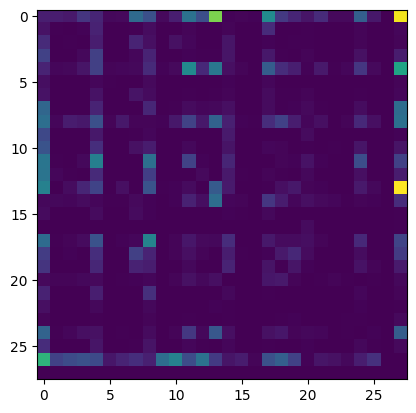

In [21]:
# We can visualize the 2D array in a nicer way
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

## Creating a Visualization of the Counts

In [22]:
# Create a reverse mapping of the string to integer (counts dictionary)
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

(-0.5, 27.5, 27.5, -0.5)

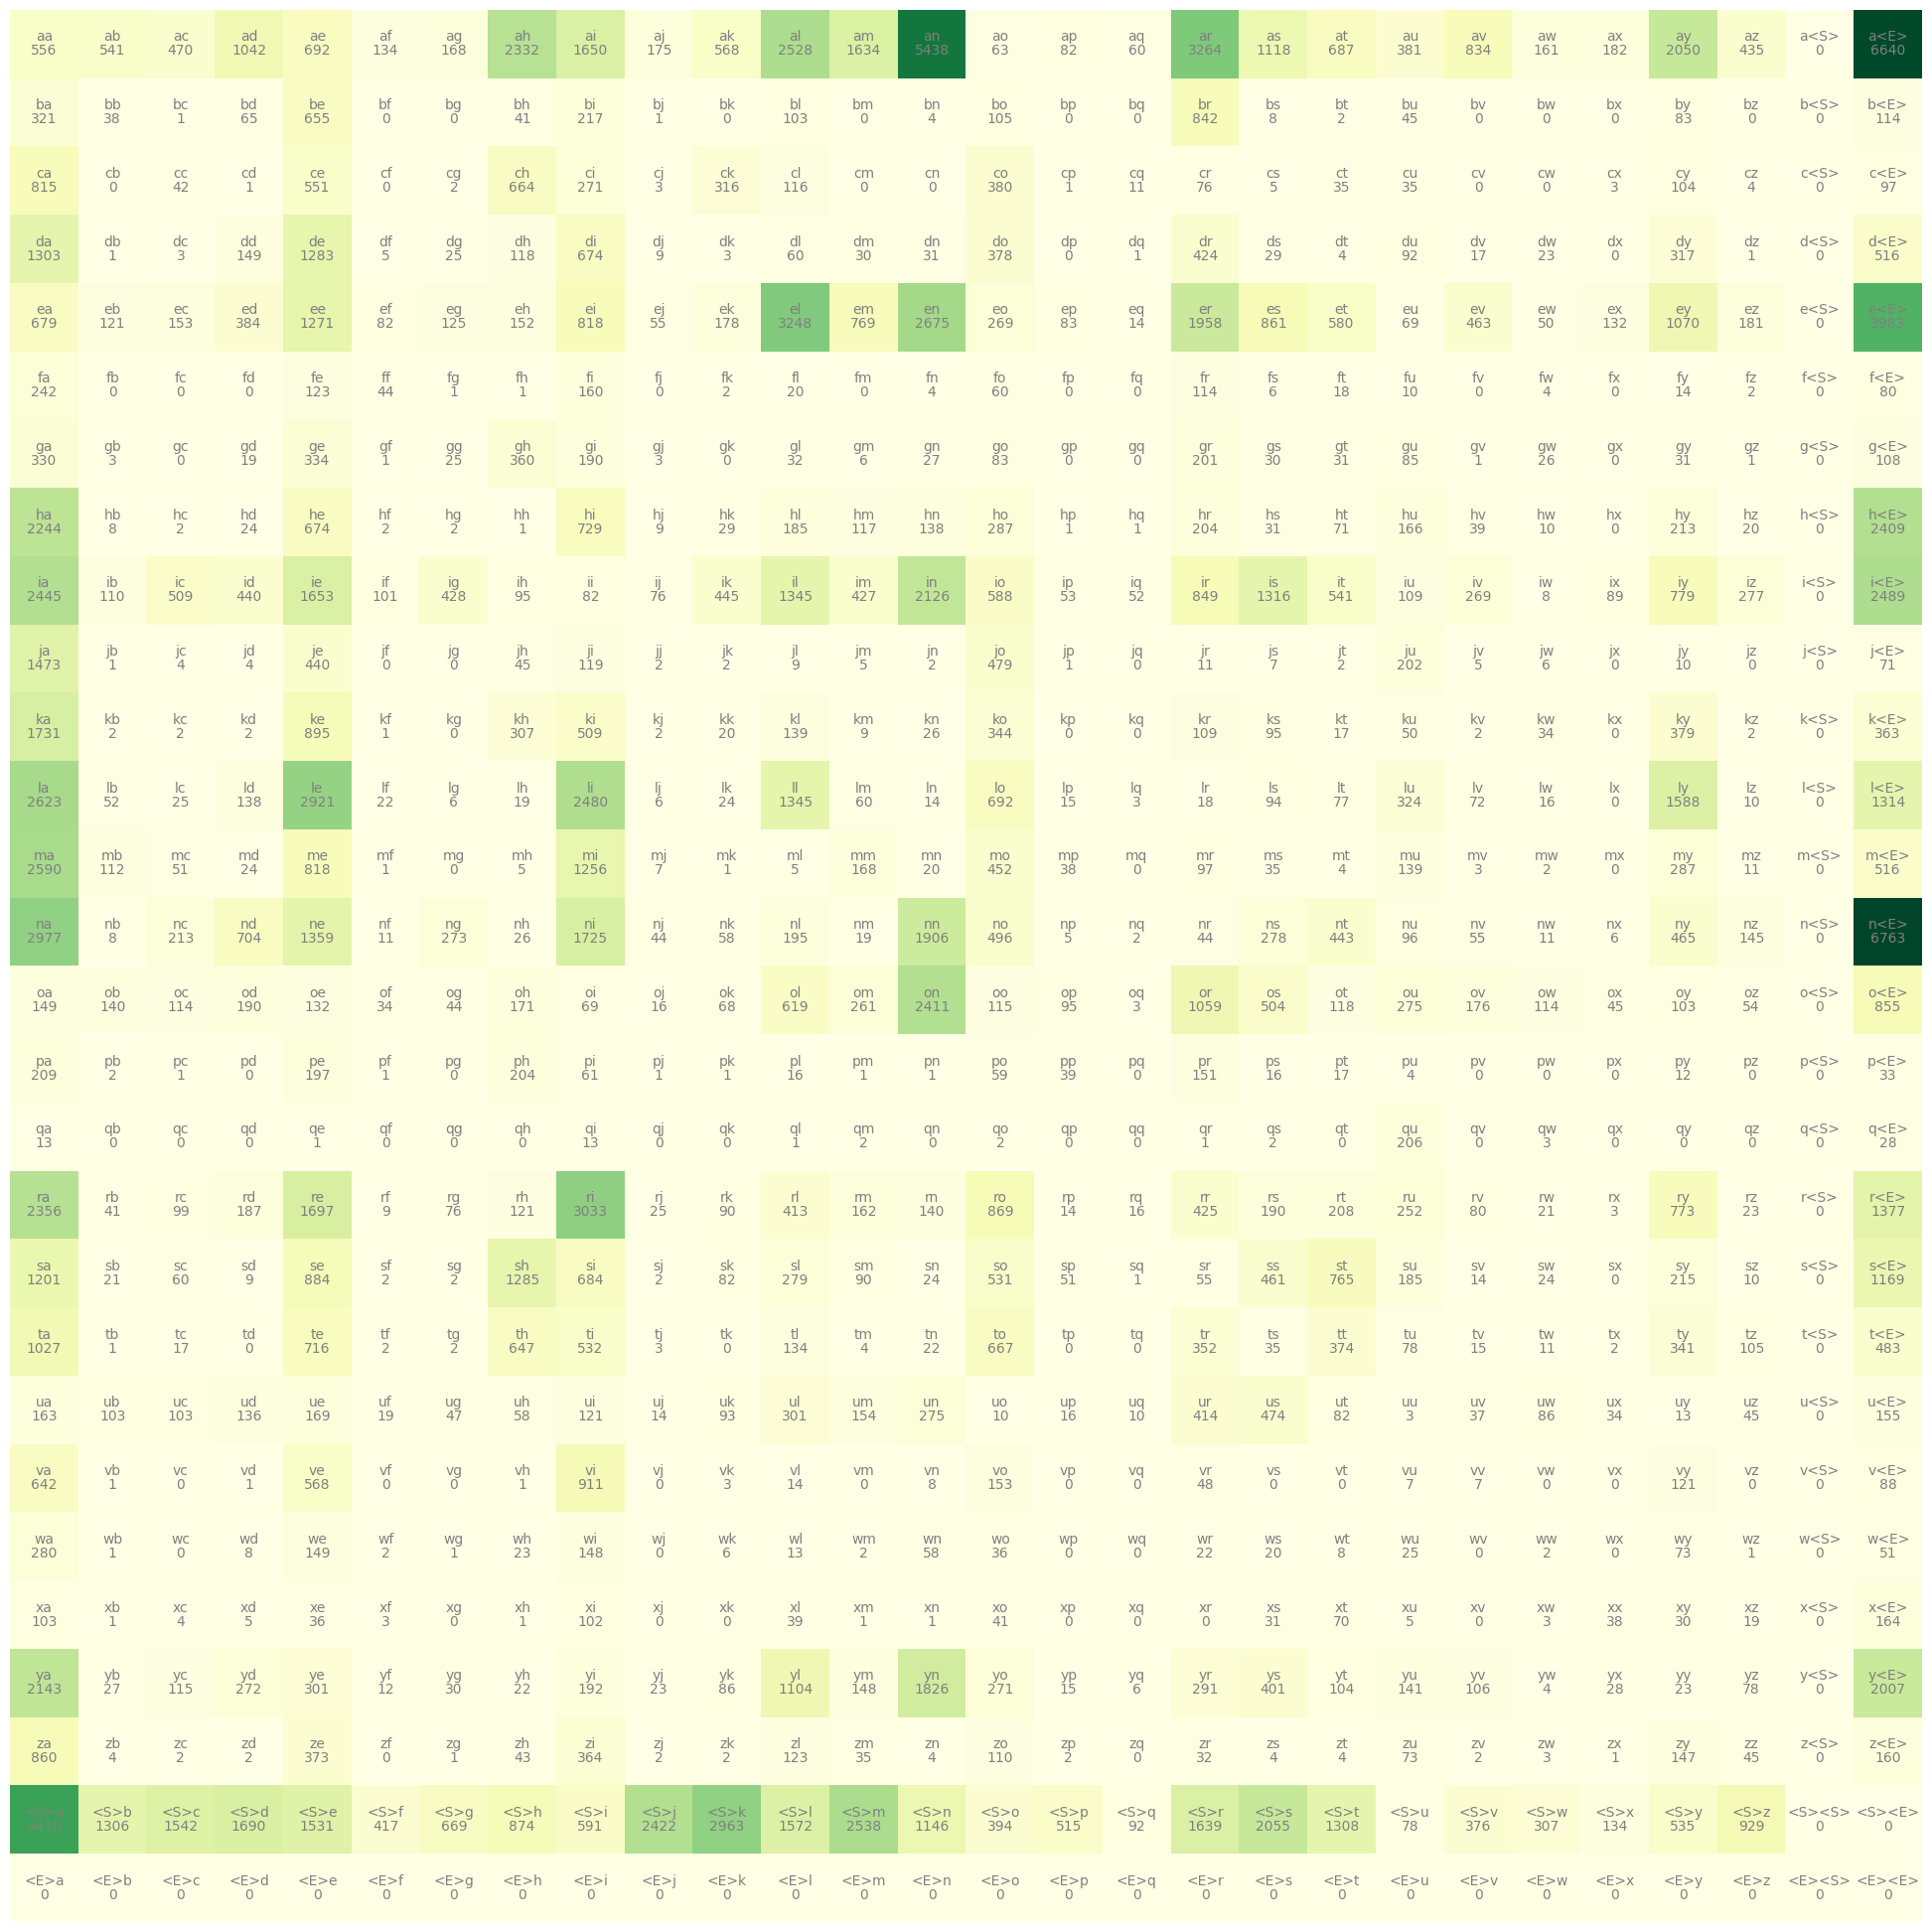

In [23]:
# Create a figure, of size in inches
plt.figure(figsize=(25,25))
# cmap is a color map: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.imshow(N, cmap="YlGn")

# In each grid, we are going to display the bigram, and its counts
for row in range(28):
    for col in range(28):
        bigram = itos[row] + itos[col]
        # The counts matrix indexes by row and column
        # The plot indexes by x, y coordinates, so we reverse the row/column
        # `ha` = horizontal alignment
        # `va` = vertical alignment
        plt.text(col, row, bigram, ha="center", va="bottom", color="gray")
        # N.item() returns the float inside of the Tensor object
        plt.text(col, row, N[row, col].item(), ha="center", va="top", color="gray")
plt.axis("off")

Since we waste an entire row and column for impossible bigrams (`"<E>"` followed by a character, `"<S>"` preceded by a character)

We will combine `"<S>"` and `"<E>"` into one single character: `'.'`

In [24]:
# Create list of unique characters
characters = sorted(list(set(''.join(words))))

stoi = {}
for index, char in enumerate(characters):
    # We shift the index by 1 since the first character is the special character "."
    stoi[char] = index + 1

# We set the special start and end character to 0
stoi["."] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [25]:
# Create a reverse mapping of the string to integer (counts dictionary)
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [26]:
# Regenerate the 2D matrix counts to use the new special character "."
num_rows = 27
num_cols = 27
N = torch.zeros((num_rows, num_cols), dtype=torch.int32)
for word in words:
    characters = ["."] + list(word) + ["."]
    for char1, char2 in zip(characters, characters[1:]):
        bigram = (char1, char2)
        row = stoi[char1]
        col = stoi[char2]
        N[row][col] += 1

(-0.5, 26.5, 26.5, -0.5)

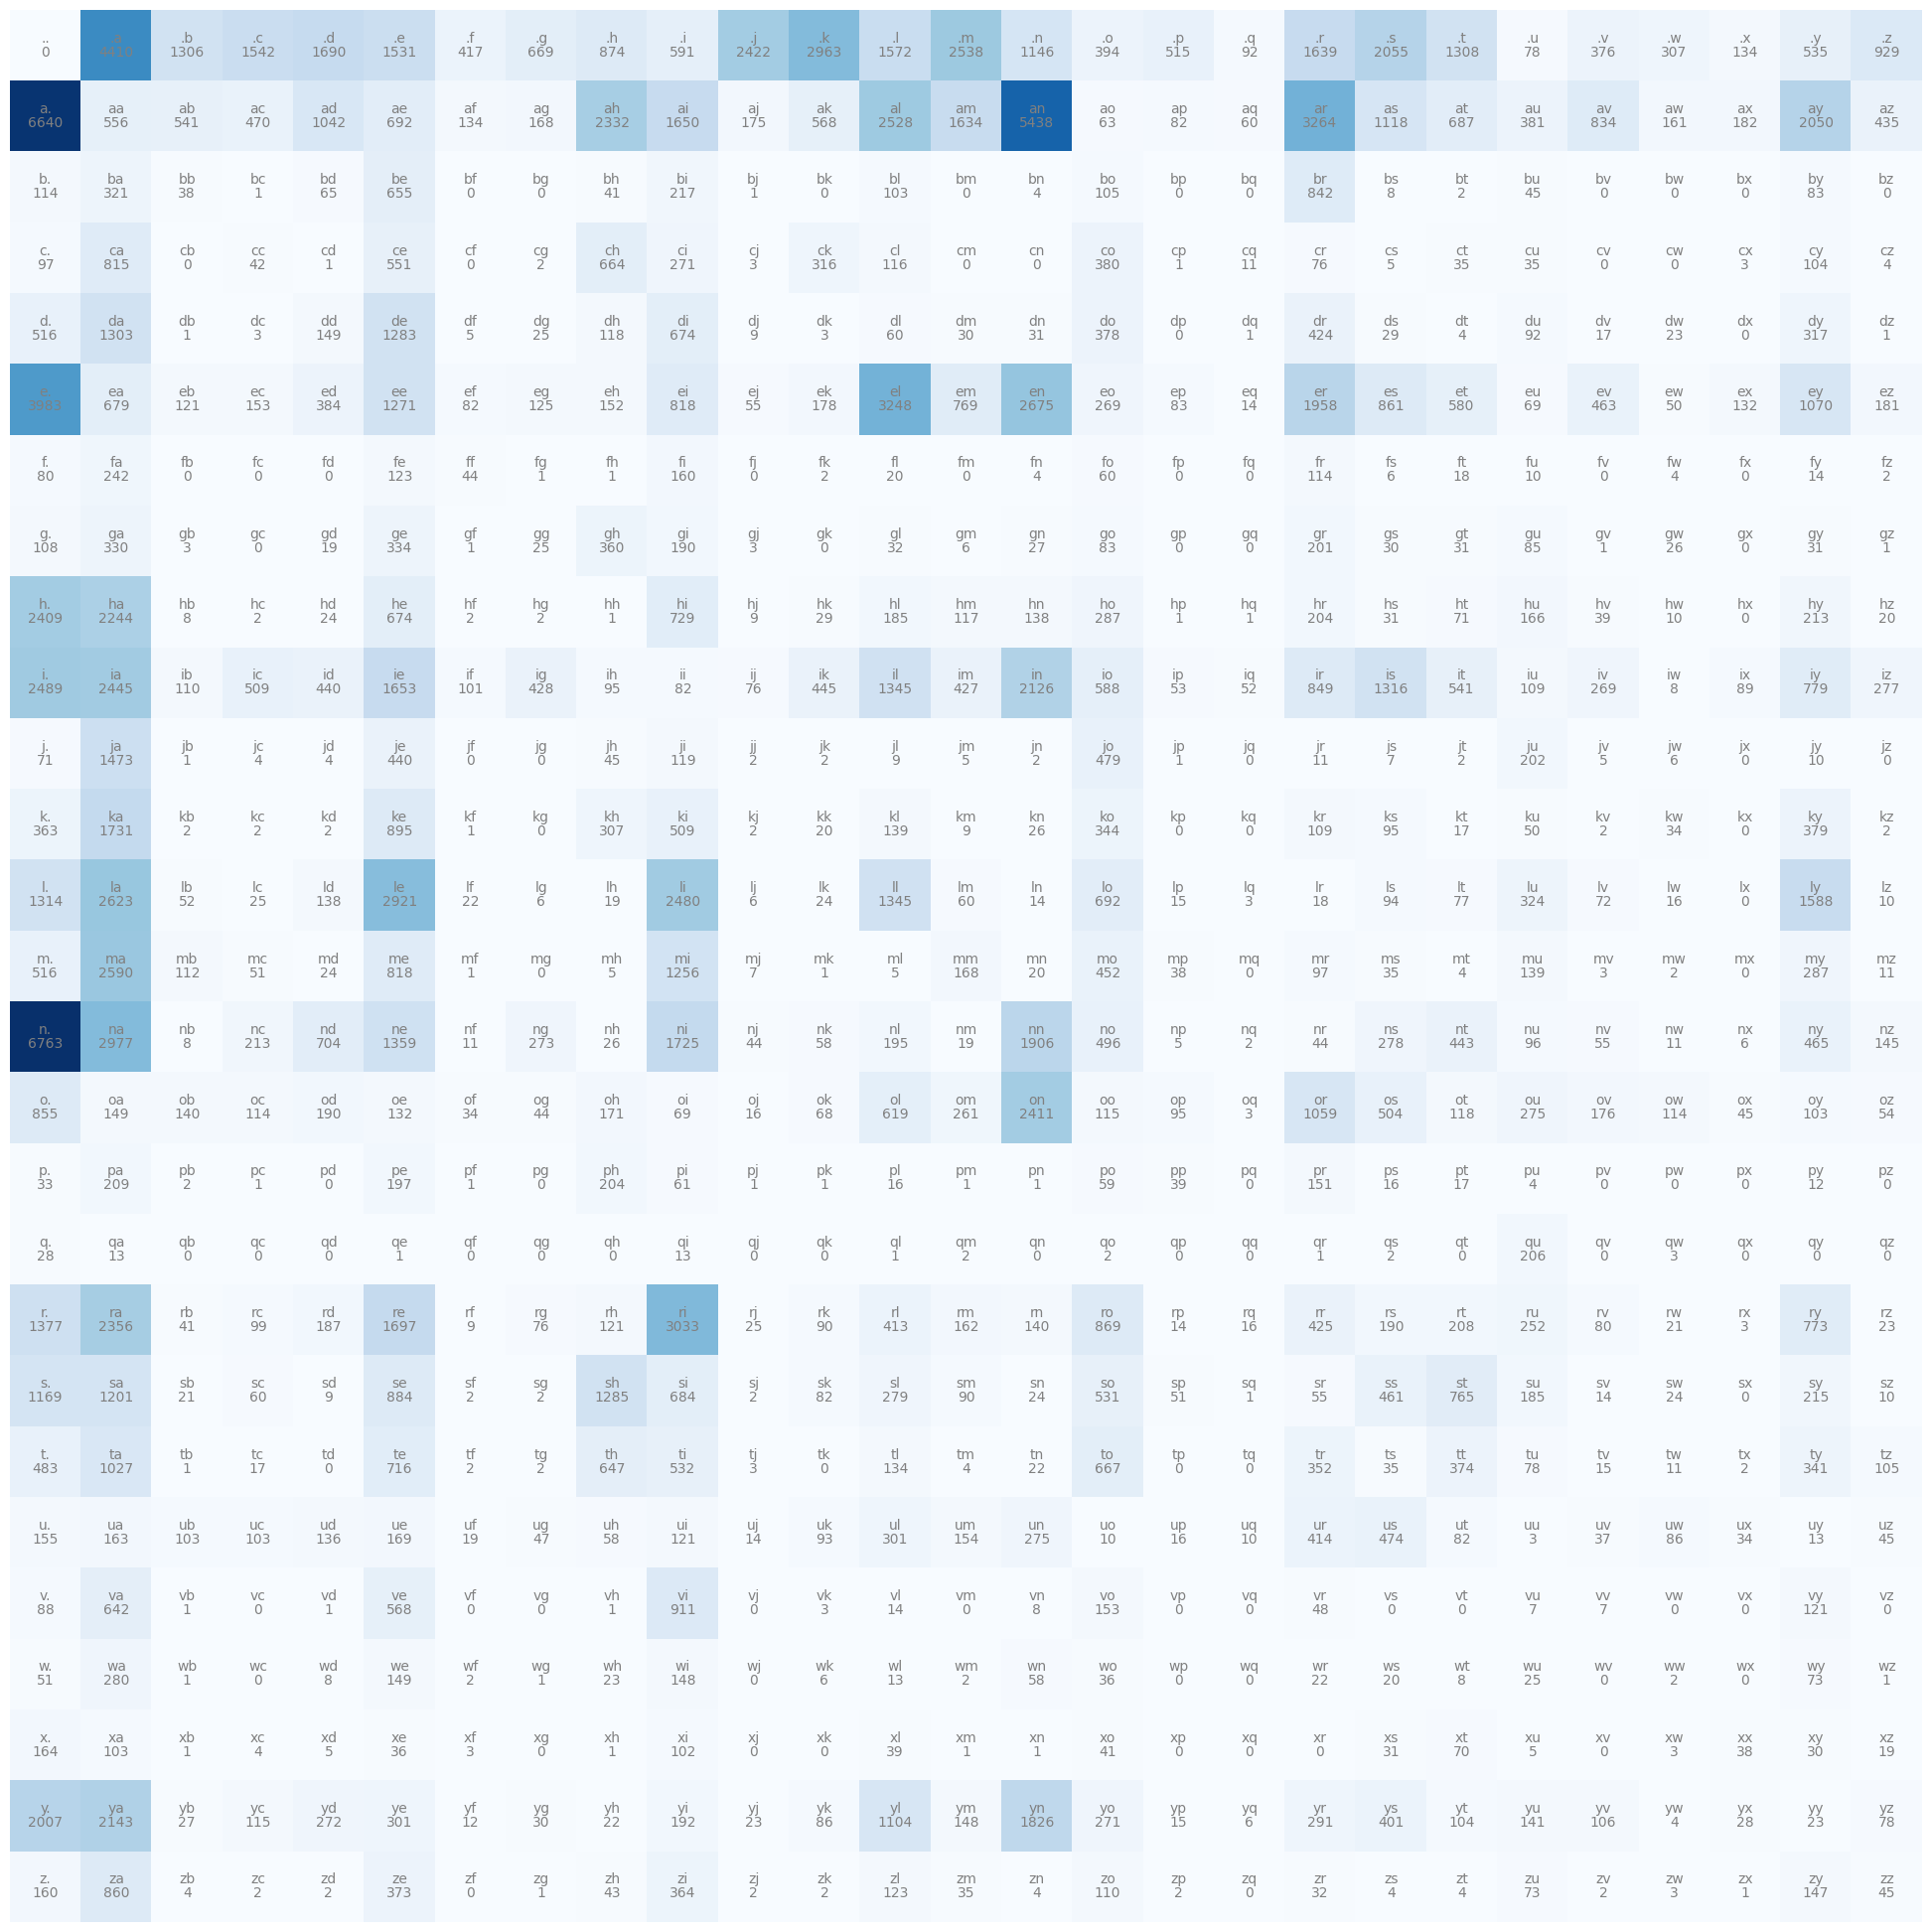

In [27]:
# Replot the graph
plt.figure(figsize=(25,25))
plt.imshow(N, cmap="Blues")
# Now we only have 27 unique characters
for row in range(27):
    for col in range(27):
        bigram = itos[row] + itos[col]
        plt.text(col, row, bigram, ha="center", va="bottom", color="gray")
        plt.text(col, row, N[row, col].item(), ha="center", va="top", color="gray")
plt.axis("off")

## Sampling from our Dataset

In [28]:
# We want to create a probability distribution of the starting character
# The starting character is the first row of our 2D grid
N[0] 

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [29]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [30]:
# We will use the Generator object to sample values from the probability distribution we obtained from the bigram dataset
# Example usage:

# We create a generator with a determined seed so that the values are deterministic
g = torch.Generator().manual_seed(2147483647)
# Generate 3 random numbers
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [31]:
# Given the probability distribution p, multinomial() chooses the indices 0-2 (the number of samples)
# with those probabilities
# Example, index 0 should be chosen with ~60% chance, index 1 at ~30% chance, and index 2 at ~10% chance
# We should see more 0s, and least 2s
# `replacement=True` means the index value chosen is eligible to be chosen again
torch.multinomial(p, num_samples=10, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0])

In [32]:
# Let's now apply this Generator to our bigram dataset
# Probability distribution of the first row (the starting character of a bigram)
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [33]:
# multinomial() returns a Tensor, so we need to call .item() to get the value inside
g = torch.Generator().manual_seed(2147483647)
index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
index

10

In [34]:
# Convert the index to see what character it is
itos[index]

'j'

In [35]:
# Now that we have the first character, we then sample the row in our 2D grid to find the probabilities
# of bigrams that begin with that character

### Running the Sampling Loop

In [36]:
g = torch.Generator().manual_seed(2147483647)

num_names = 20
names = []
for _ in range(num_names):
    # We start at the first row of our grid, since that gives us the starting character
    row = 0
    name = ""
    while True:
        # Row = first character in bigram
        # Col = second character in bigram

        # Get the row that starts with this character (`row` is the integer representation of that character)
        p = N[row]
        # Normalize the row to get probability distribution (sum=1)
        p = p / p.sum()
        # Get a character from the distribution
        col = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[col]

        # Use the second character in the bigram as the next row to check
        row = col

        # If the second character in the bigram is an ending character, we are done
        if col == 0:
            break
            
    # First name that I got: junide
    # Keeping note of names: junide, janasah
    # Not sure why I get different names from him but...
    # Remove the special character `.` at the end with [:-1] (shortname for get characters from index 0 to the end -1)
    names.append(name[:-1])

names

['junide',
 'janasah',
 'p',
 'cony',
 'a',
 'nn',
 'kohin',
 'tolian',
 'juee',
 'ksahnaauranilevias',
 'dedainrwieta',
 'ssonielylarte',
 'faveumerifontume',
 'phynslenaruani',
 'core',
 'yaenon',
 'ka',
 'jabdinerimikimaynin',
 'anaasn',
 'ssorionsush']

#### Purely Random Characters
These names from our bigram model are not the best names, but if we compare that to a probability distribution that chooses characters at random, the bigram model is at least an improvement from that

In [37]:
g = torch.Generator().manual_seed(2147483647)

num_names = 10
names = []
for _ in range(num_names):
    row = 0
    name = ""
    while True:
        # Instead of using our bigram dataset, set up a probability distribution
        # where it is equally likely to pick any character
        p = torch.ones(27)
        p = p / p.sum()
        col = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[col]
        row = col
        if col == 0:
            break
    names.append(name[:-1])

names

['juwjdvdipkcqaz',
 'p',
 'cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq',
 'coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz',
 'rjpiufmthdt',
 'rkrrsru',
 'iyumuyfy',
 'mjekujcbkhvupwyhvpvhvccragr',
 'wdkhwfdztta',
 'mplyisbxlyhuuiqzavmpocbzthqmimvyqwat']

## Precompute the Probabilities

We are inefficiently computing the probabilities every time we fetch a row from `N`. We can instead precompute the probabilities beforehand into another matrix `P`. Then we can simply index into `P` to obtain the probabilities of the next character.

In [38]:
# Create a copy of the counts matrix `N`
P = N.float()
P.shape

torch.Size([27, 27])

In [39]:
# P.sum() will only give us the sum all the counts in the entire matrix
pr = P.sum()
#pr.shape
pr

tensor(228146.)

In [40]:
# We want to sum across the columns of each row
# torch.sum https://pytorch.org/docs/stable/generated/torch.sum.html
# dim=0 will sum down the row, dim=1 will sum across the columns
pr = P.sum(dim=1)
# An row of 27 elements
pr.shape

torch.Size([27])

In [41]:
# `keepdim` will makethe axis we chose to be of size 1
# Otherwise the dimension that is size 1 is "squeezed" out
pr = P.sum(dim=1, keepdim=True)
# A column of 27 elements
pr.shape

torch.Size([27, 1])

#### Broadcasting
Could we take the 27x27 matrix P and divide it by the 27x1 column vector of sums?

To know what PyTorch will do, we have to understand its [Broadcasting Semantics](https://pytorch.org/docs/stable/notes/broadcasting.html), which is whether the Tensors can be computed together in a binary operation.

To see if broadcasting is possible, first we align the dimensions of each Tensor to the right:
```
27, 27
27, 1
```

Another example, if you had a matrix of size 27x27, and another vector of just size 27, right-aligned would look like:
```
27, 27
    27
```


Starting from the right-most dimension, we check that both Tensor's size at that dimension is either equal, one of them is at least a 1, or one of them does not exist.

In the rightmost column, the first tensor has size 27, and the second tensor has size 1. This is ok since at least one of them is a 1.
In the next column, the first tensor has size 27, and the second tensor has size 27. This is ok since they are equal.

Since all the columns satisfy the broadcasting rules, we can apply the binary operation between the 27x27 matrix and 27x1 vector.

What PyTorch will do is "stretch" out the column vector to match the size of the matrix:
```
27, 27
27, 27 <--
```

It will "make copies" of the column vector to match the shape of the matrix, then performs an element-wide division.

In [42]:
P = N.float()
# For efficiency, do in-place operations instead of copies
# Example: P = P / P.sum() makes a copy of P
# We should intead do P /= P.sum()
P /= P.sum(dim=1, keepdim=True)

In [43]:
# The sum of each row should now be 1, since it is normalized by the sum of that row
P[0].sum()

tensor(1.)

In [44]:
g = torch.Generator().manual_seed(2147483647)

num_names = 20
names = []
# `row` is the first character, `col` is the second character
for _ in range(num_names):
    row = 0
    name = ""
    while True:
        # Now we can simply index into the probabilities matrix
        p = P[row]
        col = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[col]
        row = col
        if col == 0:
            break
    names.append(name[:-1])

# This should result with the exact same names as before
names

['junide',
 'janasah',
 'p',
 'cony',
 'a',
 'nn',
 'kohin',
 'tolian',
 'juee',
 'ksahnaauranilevias',
 'dedainrwieta',
 'ssonielylarte',
 'faveumerifontume',
 'phynslenaruani',
 'core',
 'yaenon',
 'ka',
 'jabdinerimikimaynin',
 'anaasn',
 'ssorionsush']

#### Broadcasting Bugs

You need to be familiar with the [broadcasting semantics](https://pytorch.org/docs/stable/notes/broadcasting.html), otherwise you can run into many subtle bugs.

`P.sum(dim=1)` without `keepdim=True` results in size `27`
```
27, 27
  , 27
```

Since the number of dimensions is not equal, PyTorch will add a 1:
```
27, 27
1 , 27
```

In [45]:
p = N.float()
p = P.sum(dim=1, keepdim=True)
p.shape

torch.Size([27, 1])

In [46]:
p

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [47]:
P = N.float()
p = P.sum(dim=1)
p.shape

torch.Size([27])

In [48]:
p

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

In [49]:
P = N.float()
# Removing keepdim=True will result in a bug
P = P / P.sum(dim=1)
# This is because now the vector is a row vector, and broadcasting semantics will "copy" each row to match the size of the matrix
# Now each element is being divided by the sum of a different row, which doesn't properly normalize each row, and the probabilties are incorrect since the sum that is used to divide is from a different row
# Specifically each column is now normalized (sums to 1), not each row
P[:,0].sum()

tensor(1.)

In [50]:
# But each row is now not normalized
P[0].sum()

tensor(7.0225)

In [51]:
g = torch.Generator().manual_seed(2147483647)

num_names = 5
names = []
for _ in range(num_names):
    row = 0
    name = ""
    while True:
        p = P[row]
        col = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[col]
        row = col
        if col == 0:
            break
    names.append(name[:-1])

names

['juwidedigwaquzopruffyobinn',
 'fovinttophows',
 'gwevisliniauwabileviackhbduinrwiqulysstyicaylaftezufftumestfodoumjuppptsuwahouzzi',
 'core',
 'ysezockhawavedinerimouffwynin']

`P` are the parameters to this model, and we are able to sample from this model by asking for the next character in the sequence.

## Evaluating the Model's Quality
The *quality* of the model is a single number that tells us how good this model is predicting the training set.

In [52]:
# Copy-pasted the same code from above
P = N.float()
P /= P.sum(dim=1, keepdim=True)

g = torch.Generator().manual_seed(2147483647)
num_names = 5
names = []
for _ in range(num_names):
    row = 0
    name = ""
    while True:
        # Now we can simply index into the probabilities matrix
        p = P[row]
        col = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[col]
        row = col
        if col == 0:
            break
    names.append(name[:-1])
names

['junide', 'janasah', 'p', 'cony', 'a']

In [53]:
# Look through the bigrams again
num_rows = 27
num_cols = 27
for word in words[:3]: # first three words only
    characters = ["."] + list(word) + ["."]
    for char1, char2 in zip(characters, characters[1:]):
        bigram = (char1, char2)
        row = stoi[char1]
        col = stoi[char2]
        # The probability that this bigram will be chosen
        prob = P[row, col]
        print(f"{char1}{char2}: prob={prob:.4f}")

.e: prob=0.0478
em: prob=0.0377
mm: prob=0.0253
ma: prob=0.3899
a.: prob=0.1960
.o: prob=0.0123
ol: prob=0.0780
li: prob=0.1777
iv: prob=0.0152
vi: prob=0.3541
ia: prob=0.1381
a.: prob=0.1960
.a: prob=0.1377
av: prob=0.0246
va: prob=0.2495
a.: prob=0.1960


If every character was likely to be chosen, then we'd have a equal probability of 1/27 (we have 27 characters).

In [54]:
1/27

0.037037037037037035

So any probability greater that 1/27 ~= 0.037, that means the model has learned something

The goal of calculating the *quality* is to summarize these probabilities.

Commonly used: **Maximum likelihood estimation**. The **likelihood** is the product of all of the probabilities of each bigram. This tells us the probability that the bigram's probabilities were assigned by the model(?).

Higher the product, the higher the quality of the model.

Since the product will result in a small number (all the probabilities are between 0 and 1), we instead use the *log likelihood*.

In [55]:
log_likelihood = 0.0
n = 0
for word in words:
    characters = ["."] + list(word) + ["."]
    for char1, char2 in zip(characters, characters[1:]):
        bigram = (char1, char2)
        row = stoi[char1]
        col = stoi[char2]
        # The probability that this bigram will be chosen
        prob = P[row, col]
        # As probability is closer to 0, logprob is more negative
        # logprob is 0 when the probability is 1
        # Between 0 and 1, logprob is negative
        # log(a*b*c) = log(a) + log(b) + log(c)
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f"{char1}{char2}: prob={prob:.4f}, logprob={logprob:.4f}")

print(f"log_likelihood: {log_likelihood:.4f}")

log_likelihood: -559891.7500


We want to *minimize* some loss. Right now, the more negative the log likelihood, the worse the model is. So we have to take the negative of the log likelihood.

The best the model can do is when the negative log likelihood (nll) is at zero.

We also normalize the final nll by dividing by the number of logs that was calculated. This gives us the average nll.

In [56]:
nll = -log_likelihood
print(f"{nll=}")

nll=tensor(559891.7500)


In [57]:
normalized_nll = nll / n
print(f"{normalized_nll=}")

normalized_nll=tensor(2.4541)


## Model Smoothing

*"to smooth out your model a little bit and it's called model smoothing"* 笑

In [58]:
# We can put in any name
log_likelihood = 0.0
n = 0
for word in ["atsukgo"]:
    characters = ["."] + list(word) + ["."]
    for char1, char2 in zip(characters, characters[1:]):
        bigram = (char1, char2)
        row = stoi[char1]
        col = stoi[char2]
        # The probability that this bigram will be chosen
        prob = P[row, col]
        # As probability is closer to 0, logprob is more negative
        # logprob is 0 when the probability is 1
        # Between 0 and 1, logprob is negative
        # log(a*b*c) = log(a) + log(b) + log(c)
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{char1}{char2}: prob={prob:.4f}, logprob={logprob:.4f}")

print(f"log_likelihood: {log_likelihood:.4f}")

.a: prob=0.1377, logprob=-1.9829
at: prob=0.0203, logprob=-3.8984
ts: prob=0.0063, logprob=-5.0698
su: prob=0.0228, logprob=-3.7800
uk: prob=0.0297, logprob=-3.5178
kg: prob=0.0000, logprob=-inf
go: prob=0.0431, logprob=-3.1449
o.: prob=0.1078, logprob=-2.2278
log_likelihood: -inf


Here the bigram "kg" has a probability of zero, so the entire name `"atsukgo"` has a probability of zero. This results in a negative infinity loss, which we don't want.

The simple fix is *model smoothing* where we had a fake count of 1, so bigrams that are never seen have at least a probability > 0.

In [59]:
# We add 1 to every bigram
# We can add any value here. The larger the value added, the more uniform the model will be, thus "smoother"
P = (N+1).float()
P /= P.sum(dim=1, keepdim=True)

In [60]:
log_likelihood = 0.0
n = 0
for word in ["atsukgo"]:
    characters = ["."] + list(word) + ["."]
    for char1, char2 in zip(characters, characters[1:]):
        bigram = (char1, char2)
        row = stoi[char1]
        col = stoi[char2]
        # The probability that this bigram will be chosen
        prob = P[row, col]
        # As probability is closer to 0, logprob is more negative
        # logprob is 0 when the probability is 1
        # Between 0 and 1, logprob is negative
        # log(a*b*c) = log(a) + log(b) + log(c)
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{char1}{char2}: prob={prob:.4f}, logprob={logprob:.4f}")

print(f"log_likelihood: {log_likelihood:.4f}")

.a: prob=0.1376, logprob=-1.9835
at: prob=0.0203, logprob=-3.8977
ts: prob=0.0064, logprob=-5.0465
su: prob=0.0229, logprob=-3.7779
uk: prob=0.0297, logprob=-3.5157
kg: prob=0.0002, logprob=-8.5305
go: prob=0.0430, logprob=-3.1468
o.: prob=0.1075, logprob=-2.2300
log_likelihood: -32.1287


## Neural Network approach to the Bigram Model

In [61]:
# Compile the training set of this model
# We are creating two lists: the inputs, and the targets/labels
# So we are creating a mapping of a bigram: (x,y)
# where `x` is the first character, and `y` is the second character
# These will be stored as integers
xs, ys = [], []

num_rows = 27
num_cols = 27
for word in words[:1]: # look at the first word only for now
    characters = ["."] + list(word) + ["."]
    for char1, char2 in zip(characters, characters[1:]):
        c1 = stoi[char1]
        c2 = stoi[char2]
        
        # Store the integer form in the training set
        xs.append(c1)
        ys.append(c2)
        
        print(f"{char1}{char2}")

# Convert the training set to tensors
xs = torch.tensor(xs)
ys = torch.tensor(ys)

.e
em
mm
ma
a.


In [62]:
xs

tensor([ 0,  5, 13, 13,  1])

In [63]:
ys

tensor([ 5, 13, 13,  1,  0])

In [64]:
# We need to reformat the input so that it can be fed into a neural network
# "One-hot" encoding is typically used
import torch.nn.functional as F

# x encoded
# We have 27 unique characters
xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

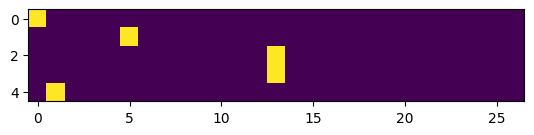

In [65]:
plt.imshow(xenc)

In [66]:
# When we feed input into our neural network we don't want to feed in integers (?)
xenc.dtype

torch.int64

In [67]:
xenc = xenc.float()
xenc.dtype

torch.float32

In [68]:
# Initialize the weights, a column vector
W = torch.randn((27, 1))
W

tensor([[ 0.1798],
        [ 1.0841],
        [-1.2559],
        [-1.6011],
        [-0.5069],
        [-0.6579],
        [-0.5728],
        [-1.2511],
        [-0.8672],
        [-0.2800],
        [ 1.2121],
        [ 0.2052],
        [-1.4894],
        [ 0.2739],
        [ 0.1684],
        [ 0.6404],
        [ 0.0355],
        [ 0.1408],
        [ 0.7690],
        [-0.2602],
        [ 0.4563],
        [ 0.1289],
        [ 0.1026],
        [ 0.7806],
        [-0.2383],
        [ 0.1134],
        [-0.6257]])

In [69]:
# We matrix multiply the input with the weights
# In PyTorch, the `@` operator means matrix multiply
# xenc = (5, 27)
# W = (27, 1)
# result = (5, 27) @ (27, 27) = (5, 1)

# This is the result of feeding in 5 input examples at the same time
xenc @ W

tensor([[ 0.1798],
        [-0.6579],
        [ 0.2739],
        [ 0.2739],
        [ 1.0841]])

In [70]:
# We want to have 27 neurons instead of just 1
W = torch.randn((27, 27))
xenc @ W

tensor([[ 1.0053, -1.2241, -0.6396,  1.3811,  1.2359, -0.7416,  0.7532,  1.0845,
         -0.2875, -0.9764,  0.3381,  0.9892, -0.6866, -0.0102, -0.8731, -0.3869,
         -0.7373,  0.6385, -1.0274, -0.5196,  0.3966,  0.4819, -0.1466,  2.3394,
          1.2081,  1.3838,  0.2101],
        [ 0.0924,  1.2775,  0.7968,  1.7098,  0.8318,  0.3292, -0.0927, -0.9115,
         -0.1152, -0.5680,  0.4353,  0.9428,  1.2570, -0.3678,  0.9157, -0.2900,
         -0.6215, -1.2558, -0.3230, -2.0975,  1.5209, -0.3157,  0.7087, -0.4794,
         -0.1978, -0.1197, -0.5054],
        [ 0.7281,  0.5940,  0.2405,  1.3104,  0.5043, -1.7919, -1.1531,  0.8708,
         -0.8253, -1.2673,  0.0883, -1.1095, -0.0309, -0.4071, -0.4266,  1.4692,
         -1.1624, -1.2814,  2.6529,  0.8027, -0.1916,  0.9764,  1.7407, -0.7401,
          1.2080,  1.7906, -1.0844],
        [ 0.7281,  0.5940,  0.2405,  1.3104,  0.5043, -1.7919, -1.1531,  0.8708,
         -0.8253, -1.2673,  0.0883, -1.1095, -0.0309, -0.4071, -0.4266,  1.4692

In [71]:
(xenc @ W).shape

torch.Size([5, 27])

In [72]:
# Each row in (5, 27) tells us the firing rate for each of those examples (5 examples in total)
# The probability of the next character given the bigram

In [73]:
# We exponentiate the weights e^(x) so that negative values are between 0 and 1, and positive values are positive values > 1
# Now we can interpret these weights similar to the counts
# where we were able to derive probabilities from
# Here the NN will try to adjust itself to the best "counts" to make better predictions
(xenc @ W).exp()

tensor([[ 2.7328,  0.2940,  0.5275,  3.9794,  3.4415,  0.4763,  2.1239,  2.9579,
          0.7501,  0.3767,  1.4022,  2.6892,  0.5033,  0.9899,  0.4176,  0.6791,
          0.4784,  1.8936,  0.3579,  0.5948,  1.4868,  1.6192,  0.8637, 10.3754,
          3.3470,  3.9899,  1.2339],
        [ 1.0969,  3.5876,  2.2184,  5.5278,  2.2974,  1.3898,  0.9115,  0.4019,
          0.8912,  0.5667,  1.5454,  2.5671,  3.5150,  0.6923,  2.4986,  0.7482,
          0.5372,  0.2848,  0.7240,  0.1228,  4.5763,  0.7293,  2.0313,  0.6192,
          0.8206,  0.8872,  0.6032],
        [ 2.0711,  1.8111,  1.2719,  3.7076,  1.6559,  0.1666,  0.3157,  2.3888,
          0.4381,  0.2816,  1.0923,  0.3297,  0.9696,  0.6656,  0.6527,  4.3459,
          0.3127,  0.2777, 14.1946,  2.2316,  0.8256,  2.6549,  5.7012,  0.4771,
          3.3467,  5.9931,  0.3381],
        [ 2.0711,  1.8111,  1.2719,  3.7076,  1.6559,  0.1666,  0.3157,  2.3888,
          0.4381,  0.2816,  1.0923,  0.3297,  0.9696,  0.6656,  0.6527,  4.3459

In [74]:
logits = xenc @ W # log counts
counts = logits.exp() # similar to the N matrix
# Normalize each row so that the row sums to 1
# Sum across the columns, keepdims=True
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0540, 0.0058, 0.0104, 0.0787, 0.0680, 0.0094, 0.0420, 0.0585, 0.0148,
         0.0074, 0.0277, 0.0532, 0.0099, 0.0196, 0.0083, 0.0134, 0.0095, 0.0374,
         0.0071, 0.0118, 0.0294, 0.0320, 0.0171, 0.2051, 0.0662, 0.0789, 0.0244],
        [0.0259, 0.0846, 0.0523, 0.1304, 0.0542, 0.0328, 0.0215, 0.0095, 0.0210,
         0.0134, 0.0365, 0.0606, 0.0829, 0.0163, 0.0589, 0.0177, 0.0127, 0.0067,
         0.0171, 0.0029, 0.1080, 0.0172, 0.0479, 0.0146, 0.0194, 0.0209, 0.0142],
        [0.0354, 0.0310, 0.0217, 0.0634, 0.0283, 0.0028, 0.0054, 0.0408, 0.0075,
         0.0048, 0.0187, 0.0056, 0.0166, 0.0114, 0.0112, 0.0743, 0.0053, 0.0047,
         0.2426, 0.0381, 0.0141, 0.0454, 0.0974, 0.0082, 0.0572, 0.1024, 0.0058],
        [0.0354, 0.0310, 0.0217, 0.0634, 0.0283, 0.0028, 0.0054, 0.0408, 0.0075,
         0.0048, 0.0187, 0.0056, 0.0166, 0.0114, 0.0112, 0.0743, 0.0053, 0.0047,
         0.2426, 0.0381, 0.0141, 0.0454, 0.0974, 0.0082, 0.0572, 0.1024, 0.0058],
        [0.0063, 0.0064,

In [75]:
# Recreate the setup using a seed
g = torch.Generator().manual_seed(2147483647)
# Create a single layer of a NN, where there are 27 neurons, each taking in 27 inputs
W = torch.randn((27, 27), generator=g)

In [76]:
# Forward pass
# First we encode our input
xenc = F.one_hot(xs, num_classes=27).float()

# Multiply the inputs with the weights
logits = xenc @ W # log counts, multiply+add
# Get the "counts" for each input
counts = logits.exp() # similar to the N matrix
# Create a probability distribution of the next character for a given character
probs = counts / counts.sum(1, keepdims=True)
# The last two lines here is also called a "softmax"
# It is used to take outputs of a neural net and converts them to a probability distribution
# All of these operations are differentiable, so we can backpropagate on them
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [110]:
# Negative log likelihood of each bigram example
nlls = torch.zeros(5)
# Go through each probabilitiy distribution of each training example
for i, prob in enumerate(probs):
    # First character in the bigram
    x = xs[i].item()
    char1 = itos[x]
    # The second character in the bigram, the "label", correct answer of `x`
    y = ys[i].item()
    char2 = itos[y]
    
    # The probabiltiy of choosing the correct next character
    p = prob[y]
    print(f"Probabilty of {char1}{char2}: {p:.4f}")
    
    logprob = torch.log(p)
    nlls[i] = -logprob
    
#loss = nlls.sum() / n
loss = nlls.mean()
#print(f"Average negative log likelihood: ", loss)
print(f"Average negative log likelihood: {loss.item():.4f}")

Probabilty of .e: 0.0123
Probabilty of em: 0.0181
Probabilty of mm: 0.0267
Probabilty of ma: 0.0737
Probabilty of a.: 0.0150
Average negative log likelihood: 3.7693


## Optimization (yay)

In [111]:
# Input data
xs

tensor([ 0,  5, 13, 13,  1])

In [112]:
# Labels
ys

tensor([ 5, 13, 13,  1,  0])

In [123]:
# Recreate the setup using a seed
g = torch.Generator().manual_seed(2147483647)
# Create a single layer of weights of a NN, where there are 27 neurons, each taking in 27 inputs
# We have to add `requires_grad=True` so that PyTorch knows to calculate the gradients
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [124]:
# Forward pass
# (5, 27), each row is the one-hot encoding of an example's input
xenc = F.one_hot(xs, num_classes=27).float()

logits = xenc @ W # log counts
counts = logits.exp() # similar to the N matrix

# Probabilities for the next character
# Normalize each row so that the row sums to 1
# Sum across the columns, keepdims=True
probs = counts / counts.sum(1, keepdims=True)

In [125]:
# The probabilities of the next character for each input example
probs.shape

torch.Size([5, 27])

In [126]:
probs[0]

tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)

In [127]:
# The probability of choosing `e` (index=5) of the first example
probs[0, 5]

tensor(0.0123, grad_fn=<SelectBackward0>)

In [128]:
# All the probabilities for each example
probs[0, 5], probs[1,13], probs[2,13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [129]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [130]:
# Index the first dimension 0-4, the second dimension using the labels
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [138]:
# Compute the negative log likelihood
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()

3.7693049907684326

In [132]:
# Forward pass end

In [133]:
# Backward pass
# Initialize the gradients to zero
W.grad = None # setting them to None is more efficient, equivalent to setting them to all zero
# PyTorch keeps track of the computational graph of the operations we did to compute the loss
# So backward() calculates the gradients
loss.backward()

In [134]:
W.shape

torch.Size([27, 27])

In [135]:
W.grad.shape

torch.Size([27, 27])

In [136]:
# Each gradient value tells us the influence of that weight on the loss function
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [137]:
# Update the weights based on the gradients
# A positive gradient tells us the weight increases the loss
step_size = 0.1
# Negative since we want to minimize the loss, so we go in the opposite direction of the gradient
W.data = -step_size * W.grad

## Optimization (yay actually)

In [160]:
# Compile the training set of this model
# We are creating two lists: the inputs, and the targets/labels
# So we are creating a mapping of a bigram: (x,y)
# where `x` is the first character, and `y` is the second character
# These will be stored as integers
xs, ys = [], []

num_rows = 27
num_cols = 27
for word in words:
    characters = ["."] + list(word) + ["."]
    for char1, char2 in zip(characters, characters[1:]):
        c1 = stoi[char1]
        c2 = stoi[char2]
        
        # Store the integer form in the training set
        xs.append(c1)
        ys.append(c2)

# Convert the training set to tensors
xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f"{xs.shape[0]} examples")

228146 examples


In [161]:
# Recreate the setup using a seed
g = torch.Generator().manual_seed(2147483647)
# Create a single layer of weights of a NN, where there are 27 neurons, each taking in 27 inputs
# We have to add `requires_grad=True` so that PyTorch knows to calculate the gradients
W = torch.randn((27, 27), generator=g, requires_grad=True)
# Encode the input to one-hot encoding
xenc = F.one_hot(xs, num_classes=27).float()

In [164]:
# Run through the network!
num_iterations = 100
num_examples = xs.shape[0]
step_size = 50
for i in range(num_iterations):
    # ----- Forward pass
    logits = xenc @ W # log counts
    counts = logits.exp() # similar to the N matrix
    # Probabilities for the next character
    probs = counts / counts.sum(1, keepdims=True)
    # Compute the loss, the negative log likelihood
    loss = -probs[torch.arange(num_examples), ys].log().mean()
    print(f"Iteration {i}, loss: {loss.item():.4f}")
    
    # ----- Backward pass
    # Initialize the gradients to zero
    W.grad = None # setting them to None is more efficient, equivalent to setting them to all zero
    # Calculate the gradients
    loss.backward()
    # Update the weights using the calculated gradients
    W.data += -step_size * W.grad

Iteration 0, loss: 2.6886
Iteration 1, loss: 2.6693
Iteration 2, loss: 2.6526
Iteration 3, loss: 2.6380
Iteration 4, loss: 2.6252
Iteration 5, loss: 2.6138
Iteration 6, loss: 2.6037
Iteration 7, loss: 2.5947
Iteration 8, loss: 2.5866
Iteration 9, loss: 2.5793
Iteration 10, loss: 2.5727
Iteration 11, loss: 2.5667
Iteration 12, loss: 2.5612
Iteration 13, loss: 2.5562
Iteration 14, loss: 2.5515
Iteration 15, loss: 2.5473
Iteration 16, loss: 2.5433
Iteration 17, loss: 2.5397
Iteration 18, loss: 2.5363
Iteration 19, loss: 2.5331
Iteration 20, loss: 2.5301
Iteration 21, loss: 2.5273
Iteration 22, loss: 2.5247
Iteration 23, loss: 2.5223
Iteration 24, loss: 2.5200
Iteration 25, loss: 2.5178
Iteration 26, loss: 2.5158
Iteration 27, loss: 2.5138
Iteration 28, loss: 2.5120
Iteration 29, loss: 2.5103
Iteration 30, loss: 2.5087
Iteration 31, loss: 2.5071
Iteration 32, loss: 2.5056
Iteration 33, loss: 2.5042
Iteration 34, loss: 2.5029
Iteration 35, loss: 2.5016
Iteration 36, loss: 2.5004
Iteration 3

### Counting vs. NN

In our counting approach above, we got a loss of `2.4541`, so in the NN approach, we should also get roughly the same loss. This is because we aren't using any new data from the bigram dataset when we run our NN. We are still predicting the next character given a single character (no other context of what additional characters came before it, for example).

The NN is basically computing the counts matrix for us. In the counting approach, we built this counts matrix simply by counting the bigram occurences in our dataset. In the NN approach, we start with a random counts, then iteratively forward/backward passes adjusts our random "counts" toward a more correct counts/probabilties.

The weights matrix `W` is analogous to our counts matrix. `W.exp()` is the counts.

The matrix multiply `xenc @ W` in our NN takes the probability of the next character given the first character. The one-hot encoding and matrix multiply is plucking out that probability. This is exactly what we did in the counting approach.